In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv('data/mbti_1.csv')
df

type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]

In [3]:

def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))
df

type                                              posts  \
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1     ENTP  'I'm finding the lack of me in these posts ver...   
2     INTP  'Good one  _____   https://www.youtube.com/wat...   
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4     ENTJ  'You're fired.|||That's another silly misconce...   
...    ...                                                ...   
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...   
8671  ENFP  'So...if this thread already exists someplace ...   
8672  INTP  'So many questions when i do these things.  I ...   
8673  INFP  'I am very conflicted right now when it comes ...   
8674  INFP  'It has been too long since I have been on per...   

      words_per_comment  variance_of_word_counts  
0                 11.12                 135.2900  
1                 23.40                 187.4756  
2                 16.72                 180.6900  
3                 21.28                 181.8324  
4                 19.34                 196.4576  
...                 ...                      ...  
8670              15.92                 125.3300  
8671              26.18                 125.6144  
8672              18.96                 169.7764  
8673              34.10                  57.0336  
8674              27.22                 155.9200  

[8675 rows x 4 columns]

/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the marker

<AxesSubplot:xlabel='type', ylabel='words_per_comment'>

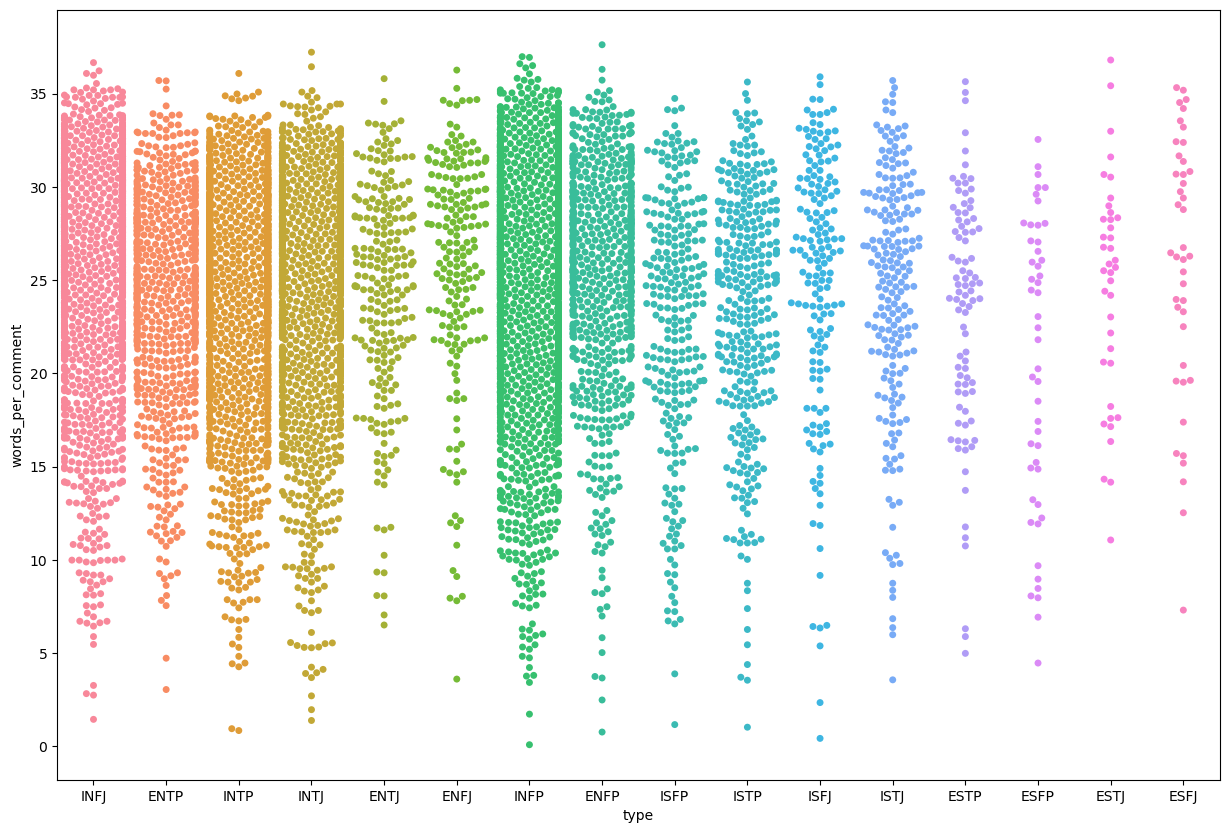

In [4]:
plt.figure(figsize=(15,10))
sb.swarmplot("type", "words_per_comment", data=df)

In [5]:
df.groupby('type').agg({'type':'count'})

type
type      
ENFJ   190
ENFP   675
ENTJ   231
ENTP   685
ESFJ    42
ESFP    48
ESTJ    39
ESTP    89
INFJ  1470
INFP  1832
INTJ  1091
INTP  1304
ISFJ   166
ISFP   271
ISTJ   205
ISTP   337

In [6]:
X= df.posts
y = df.type

In [7]:
df_2 = df[~df['type'].isin(['ESFJ','ESFP','ESTJ','ESTP'])]
df_2['http_per_comment'] = df_2['posts'].apply(lambda x: x.count('http')/50)
df_2['qm_per_comment'] = df_2['posts'].apply(lambda x: x.count('?')/50)
df_2.head()

/var/folders/zx/f3x1cdq12r37rn4kv9477k6m0000gn/T/ipykernel_33991/1364002200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['http_per_comment'] = df_2['posts'].apply(lambda x: x.count('http')/50)
/var/folders/zx/f3x1cdq12r37rn4kv9477k6m0000gn/T/ipykernel_33991/1364002200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['qm_per_comment'] = df_2['posts'].apply(lambda x: x.count('?')/50)


type                                              posts  words_per_comment  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12   
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40   
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28   
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34   

   variance_of_word_counts  http_per_comment  qm_per_comment  
0                 135.2900              0.48            0.36  
1                 187.4756              0.20            0.10  
2                 180.6900              0.10            0.24  
3                 181.8324              0.04            0.22  
4                 196.4576              0.12            0.20

In [8]:
print(df_2.groupby('type').agg({'http_per_comment': 'mean'}))
print(df_2.groupby('type').agg({'qm_per_comment': 'mean'}))

      http_per_comment
type                  
ENFJ          0.053263
ENFP          0.050459
ENTJ          0.053160
ENTP          0.048263
INFJ          0.065878
INFP          0.075426
INTJ          0.063593
INTP          0.070767
ISFJ          0.070602
ISFP          0.088339
ISTJ          0.061171
ISTP          0.081009
      qm_per_comment
type                
ENFJ        0.213053
ENFP        0.227259
ENTJ        0.240000
ENTP        0.220964
INFJ        0.208966
INFP        0.202533
INTJ        0.214849
INTP        0.221580
ISFJ        0.200964
ISFP        0.216384
ISTJ        0.214927
ISTP        0.221602


/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1500x1000 with 0 Axes>

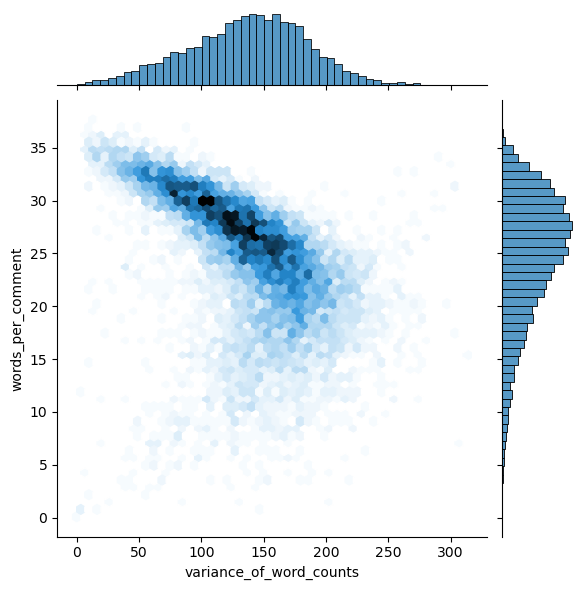

In [9]:
plt.figure(figsize=(15,10))
sb.jointplot("variance_of_word_counts", "words_per_comment", data=df_2, kind="hex")

/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

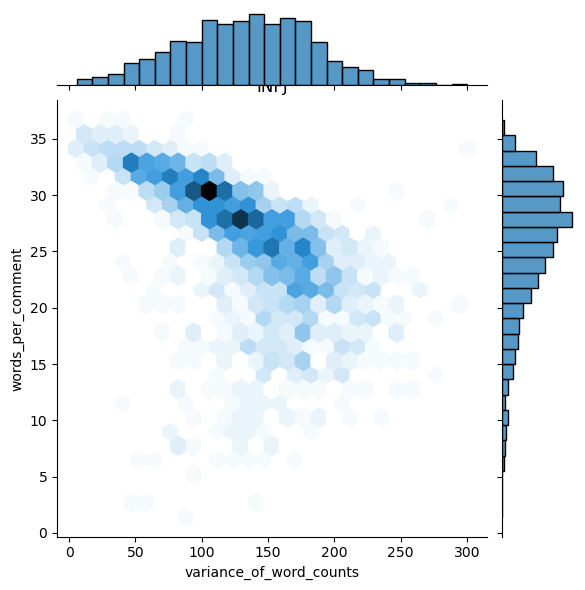

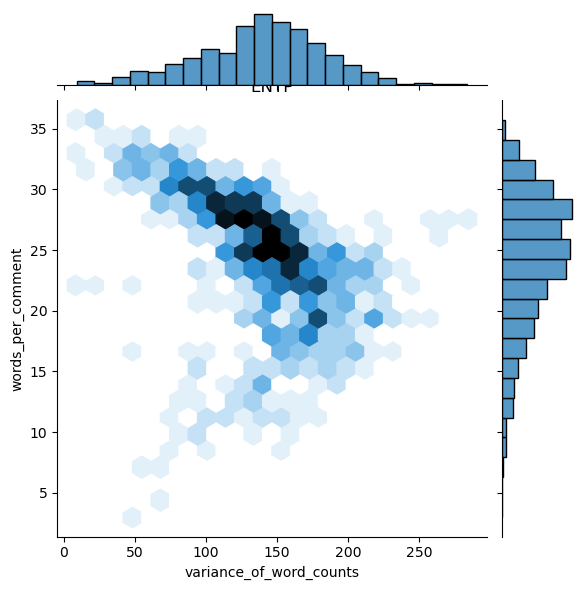

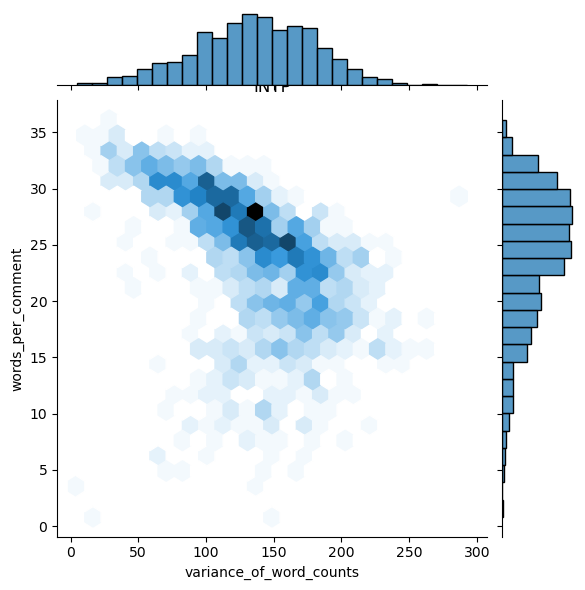

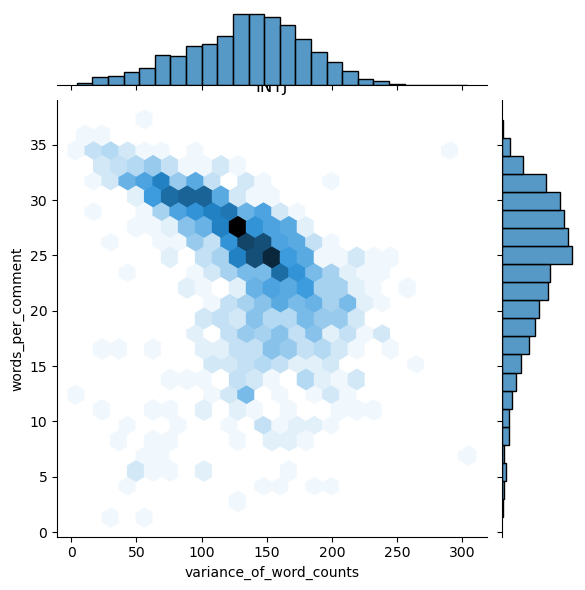

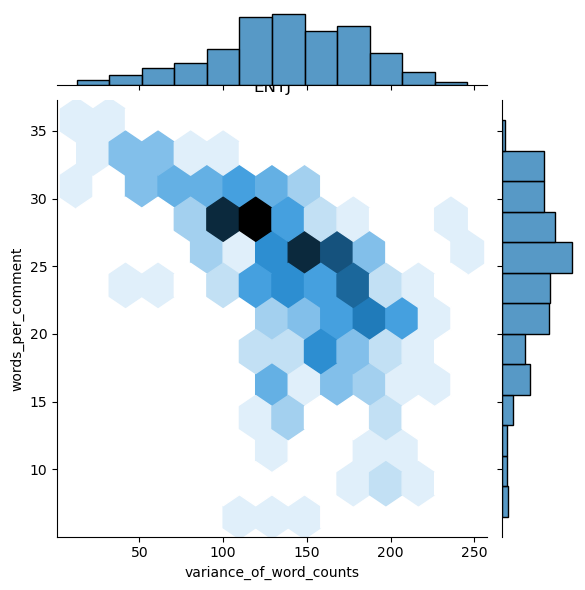

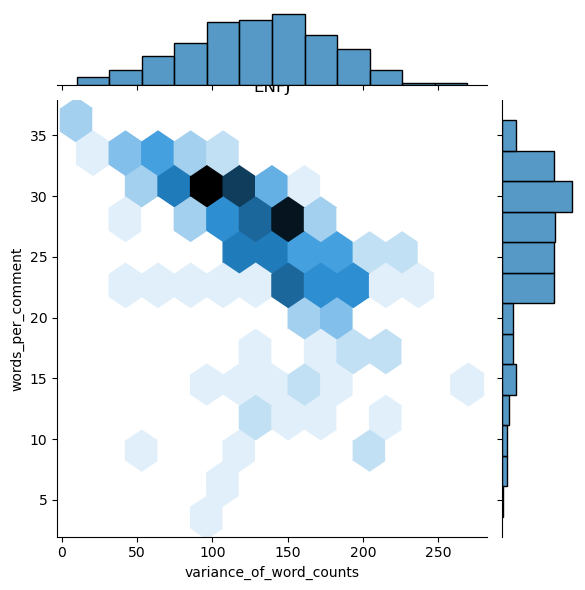

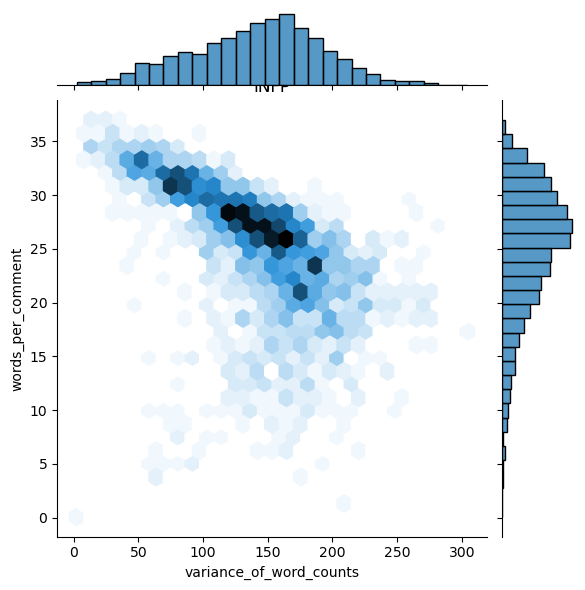

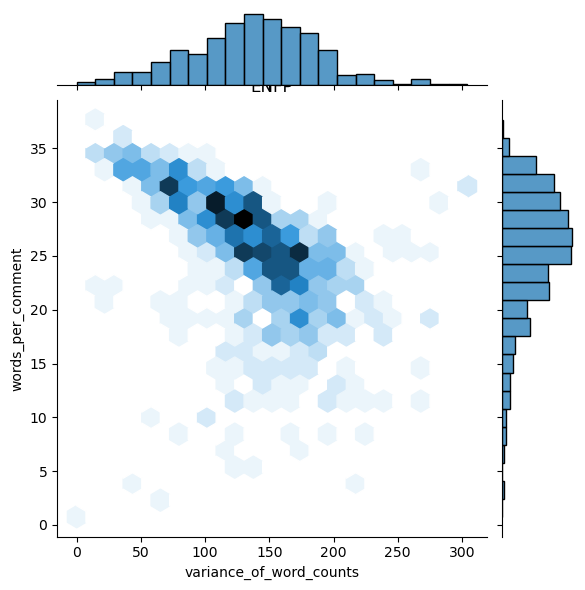

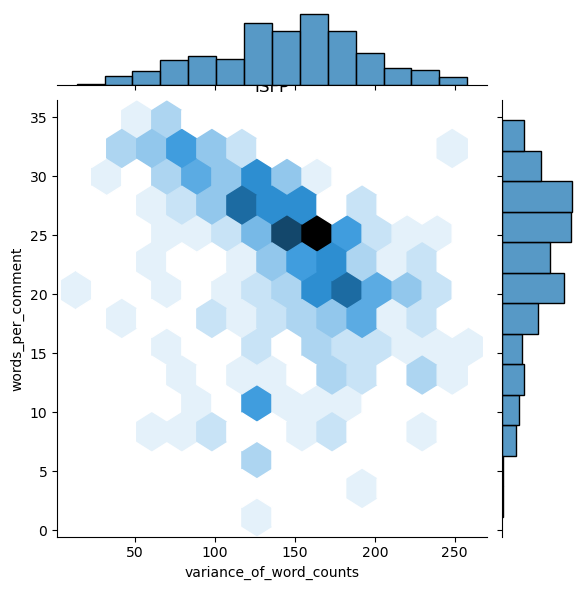

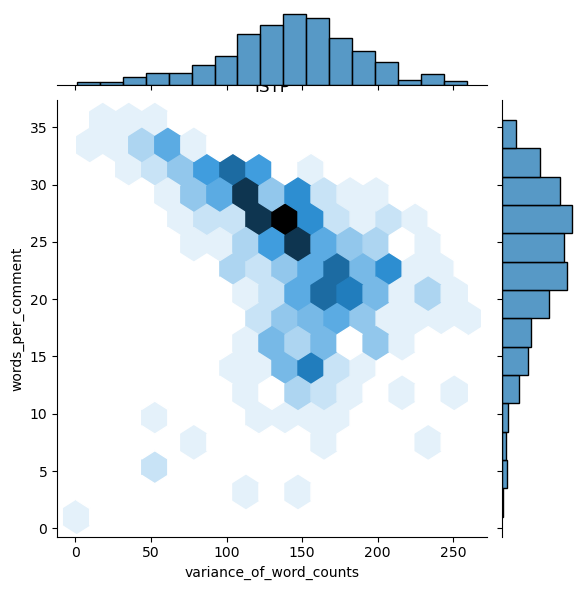

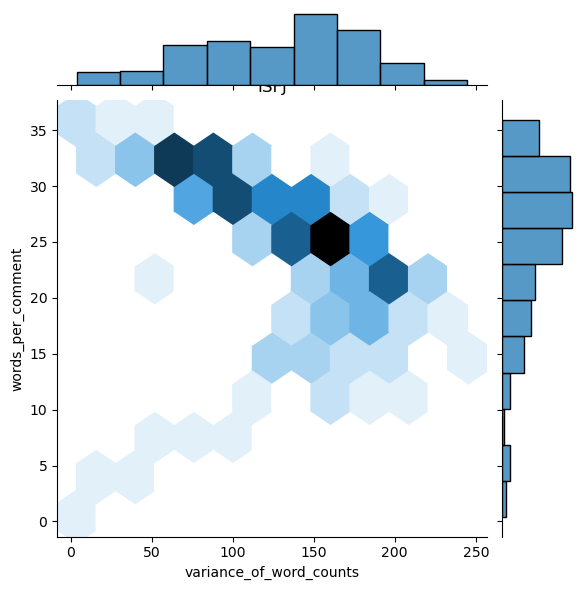

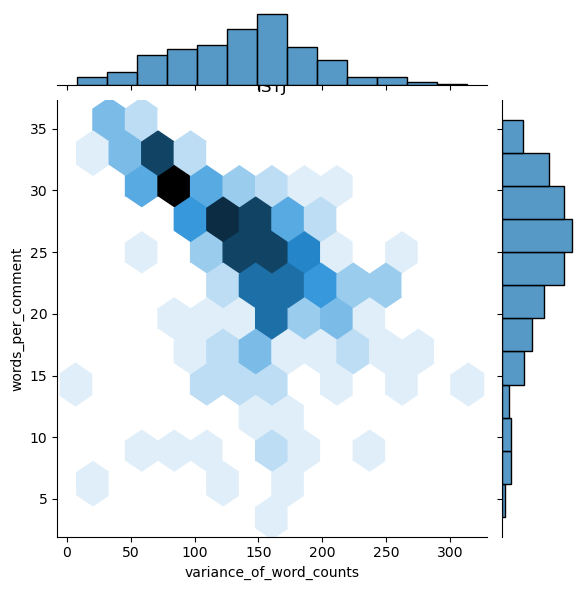

In [10]:
def plot_jointplot(mbti_type, axs, titles):
    df_3 = df_2[df_2['type'] == mbti_type]
    sb.jointplot("variance_of_word_counts", "words_per_comment", data=df_3, kind="hex", ax = axs, title = titles)
    
i = df_2['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,6):
        df_3 = df_2[df_2['type'] == i[k]]
        sb.jointplot("variance_of_word_counts", "words_per_comment", data=df_3, kind="hex")
        plt.title(i[k])
        k+=1

In [11]:
!pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-macosx_10_9_x86_64.whl (160 kB)


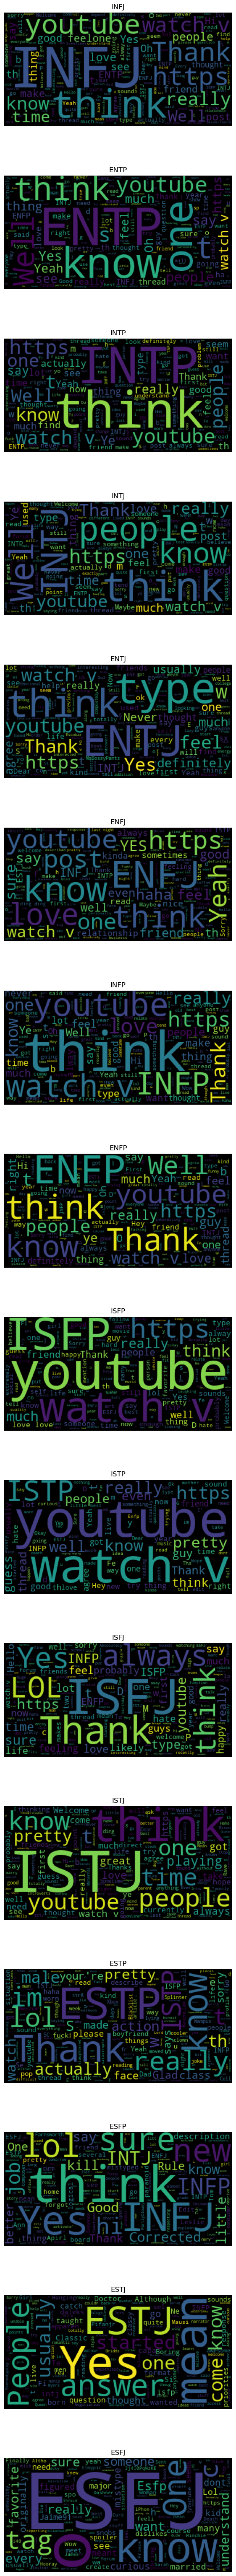

In [12]:

from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(7,5*len(df['type'].unique())))

k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud().generate(df_4['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1

In [13]:
df.describe()

words_per_comment  variance_of_word_counts
count        8675.000000              8675.000000
mean           24.524830               137.209864
std             6.224211                48.285206
min             0.080000                 0.000000
25%            20.930000               105.481800
50%            25.560000               140.330000
75%            29.140000               170.478384
max            37.620000               313.290000

In [14]:
df['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     8675 non-null   object 
 1   posts                    8675 non-null   object 
 2   words_per_comment        8675 non-null   float64
 3   variance_of_word_counts  8675 non-null   float64
dtypes: float64(2), object(2)
memory usage: 271.2+ KB


In [16]:
df.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [17]:
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
import re

In [18]:
def clear_text(data):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    for sentence in tqdm(data):
        sentence=sentence.lower()
        
#         removing links from text data
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    
#         removing other symbols
        sentence=re.sub('[^0-9a-z]',' ',sentence)
    
        
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length

In [19]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=42)

In [20]:
X_train.posts,train_length=clear_text(X_train)

100%|█████████████████████████████████████| 6506/6506 [00:03<00:00, 2144.66it/s]


In [21]:
X_test.post, test_length=clear_text(X_test)

100%|█████████████████████████████████████| 2169/2169 [00:01<00:00, 2143.21it/s]


/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


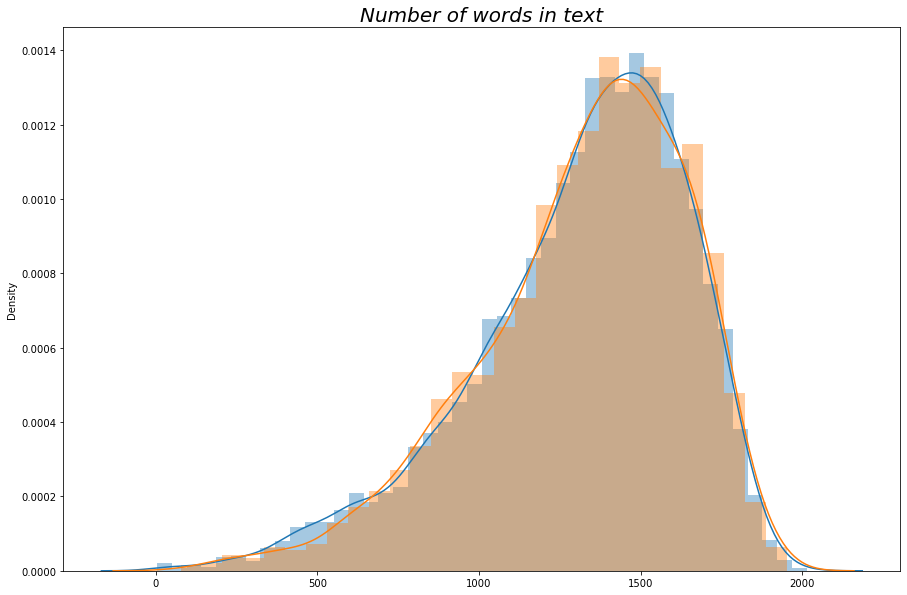

In [22]:
plt.figure(figsize=(15,10))
sb.distplot(train_length,label='train data word length')
sb.distplot(test_length,label='test data word length')
plt.title('Number of words in text',fontdict={'size':20,'style':'italic'})
plt.show()

In [23]:
import plotly.express as px
px.pie(X_train,names=y,title='Personality type',hole=0.3)

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()